In [1]:
#关于文档的一个数据分类
import pandas as pd
import seaborn as sns  #用于绘制热图的工具包
from scipy.cluster import hierarchy  #用于进行层次聚类，话层次聚类图的工具包
from scipy import cluster   
import matplotlib.pyplot as plt
from sklearn import decomposition as skldec #用于主成分分析降维的包
import numpy as np
#import csv
import math
from pandas import Series,DataFrame
from matplotlib.ticker import  MultipleLocator
import pylab as pl   #画图用
from sklearn import svm
from sklearn import linear_model

In [2]:
pop=['2000Pop','2001Pop','2002Pop','2003Pop','2004Pop','2005Pop','2006Pop','2007Pop','2008Pop','2009Pop',
     '2010Pop','2011Pop','2012Pop','2013Pop','2014Pop','2015Pop','2016Pop','2017Pop']
gdp=['2000GDP','2001GDP','2002GDP','2003GDP','2004GDP','2005GDP','2006GDP','2007GDP','2008GDP','2009GDP',
     '2010GDP','2011GDP','2012GDP','2013GDP','2014GDP','2015GDP','2016GDP','2017GDP']
area=['2000Area','2001Area','2002Area','2003Area','2004Area','2005Area','2006Area','2007Area','2008Area','2009Area',
     '2010Area','2011Area','2012Area','2013Area','2014Area','2015Area','2016Area','2017Area']
roadleng=['2000Roadleng','2001Roadleng','2002Roadleng','2003Roadleng','2004Roadleng','2005Roadleng','2006Roadleng','2007Roadleng','2008Roadleng','2009Roadleng',
     '2010Roadleng','2011Roadleng','2012Roadleng','2013Roadleng','2014Roadleng','2015Roadleng','2016Roadleng','2017Roadleng']
inv_times=['2000invtime','2001invtime','2002invtime','2003invtime','2004invtime','2005invtime','2006invtime','2007invtime','2008invtime','2009invtime',
     '2010invtime','2011invtime','2012invtime','2013invtime','2014invtime','2015invtime','2016invtime','2017invtime']
investment=['2000inv','2001inv','2002inv','2003inv','2004inv','2005inv','2006inv','2007inv','2008inv','2009inv',
     '2010inv','2011inv','2012inv','2013inv','2014inv','2015inv','2016inv','2017inv']

In [3]:
data =pd.read_excel('E:/文档系列/python 系列/TheData/0_theDATA_end(1991-2017pop&GDP&vc)/ALL_Intersection.xlsx')  # 读取训练数据
city=data['City'].drop_duplicates().values
City=data['city'].drop_duplicates().values

In [4]:
from scipy.optimize import leastsq  ##引入最小二乘法算法
#需要拟合的函数func :指定函数的形状
def func(p,x):
    k,b=p
    return k*x+b

##偏差函数：x,y都是列表:这里的x,y更上面的Xi,Yi中是一一对应的
def error(p,x,y):
    return func(p,x)-y

plt.rcParams['font.sans-serif']=['Simhei']     #解决中文显示问题，目前只知道黑体可行
plt.rcParams['axes.unicode_minus']=False       #解决负数坐标显示问题
##### 求残差 logy-log（kx+b）
def GuiJI(data,xl,yl,i,xname,yname):
    ###xl,yl：列名的list,xname,yname：列名,i:年份
    city=data['City'].drop_duplicates().values
    r=[]  ###标度率
    ###保存取完log后大于0的值
    p=[]
    g=[]
    ###保存所有的log值，小于0的记录为-1
    p2=[]
    g2=[]
    ###取列值的log
    XI=data[xl[i]]
    YI=data[yl[i]]
    xi=np.log(XI)
    yi=np.log(YI)
    XII=xi.fillna(np.infty) ###将空值置为inf
    YII=yi.fillna(np.infty)
    ###判断是否大于0
    City=[]###保存log值大于0的城市名
    for mm in range(len(XII)):
        if XII[mm]==-float('Inf') or XII[mm]==float('Inf') or YII[mm]==-float('Inf') or YII[mm]==float('Inf'):
            continue
        else:
            p.append(XII[mm])
            g.append(YII[mm])
            City.append(city[mm])
    return(City)
cityM = GuiJI(data,pop,investment,15,'pop','amount')###按照2015年含有投资金额的城市来删选2000-2016年间关于GDP\amount\times的数据

D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


In [5]:
dataM = pd.DataFrame(columns=data.columns)
for cc in range(len(city)):
    if city[cc] in cityM:
        dataM.loc[cc] = list(data[cc:cc+1].values[0])

In [6]:
dataPOP=dataM.iloc[:,3:21]###获取POP的数据
dataGDP=dataM.iloc[:,22:40]###获取GDP的数据
dataAmount = dataM.iloc[:,50:68]###投资金额
dataTimes = dataM.iloc[:,77:95]###投资次数

In [8]:
####计算城市两者之间的相关性 ######
def AnumT2(data,data2,pop,m):###m代表第几行的城市
    corrCity = []###记录城市的相关性值  
    for t in range(1,11):
        Acity = [] ###记录每两年间的情况
        pop1 = data.iloc[m:m+1,0:len(pop)-t].fillna(0).values[0]###时间序列长度必须一致，每次往后挪一列
        pop2 = data2.iloc[m:m+1,t:18].fillna(0).values[0]
        a1=0
        a2=0
        for xx in range(len(pop1)):
            a1+=pop1[xx]**2
            a2+=pop2[xx]**2
        a=(a1**0.5)*(a2**0.5)
        b=0
        for j in range(len(pop1)):
            b+=pop1[j]*pop2[j]
        if a==0:
            corrCity.append(0)
        else:
            corrCity.append(b/a)
    return(corrCity)

In [9]:
TCity_AT = []
TCity_AG = []
for nn in range(dataM.shape[0]):
    TCity_AT.append(AnumT2(dataAmount,dataTimes,inv_times,nn))
    TCity_AG.append(AnumT2(dataAmount,dataGDP,gdp,nn))
dfT_AT=pd.DataFrame(TCity_AT)
dfT_AG=pd.DataFrame(TCity_AG)
meanTAT = dfT_AT.mean()
meanTAG = dfT_AG.mean()

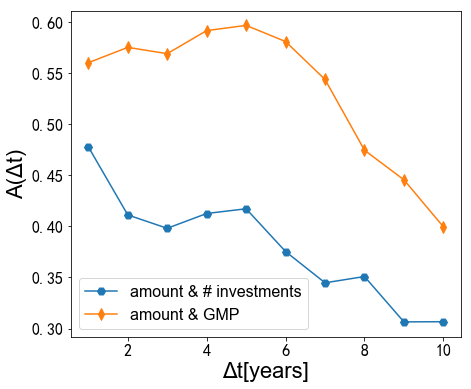

In [10]:
x=np.arange(1,11)
plt.figure(figsize=(7,6))
# plt.plot(x,meanTA,marker='o',label='amount')
plt.plot(x,meanTAT,marker='H',label='amount & # investments',markersize=8)
plt.plot(x,meanTAG,marker='d',label='amount & GMP',markersize=8)
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 22,
    }
font1 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 16,
    }
plt.tick_params(labelsize=16) #刻度字体大小13
plt.xlabel('Δt[years]',font2)
plt.ylabel('A(Δt)',font2)
plt.legend(prop=font1)
plt.savefig('E:/文档系列/python 系列/picScalling/20201025NEW/Supplementary Fig5.pdf', bbox_inches='tight')